<a href="https://colab.research.google.com/github/Aqillaaprly/Rakamin_FinalProject_DS59/blob/Mercy/Otak_Atik_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
df = pd.read_csv("recruitment_efficiency_improved.csv")
df.head()

,recruitment_id,department,job_title,num_applicants,time_to_hire_days,cost_per_hire,source,offer_acceptance_rate
0,1,Engineering,Software Engineer,280,24,1400.38,Referral,0.98
1,2,Sales,Account Executive,262,7,2730.45,LinkedIn,0.84
2,3,Product,UX Designer,11,76,5286.12,LinkedIn,0.83
3,4,Engineering,DevOps Engineer,238,26,5255.78,Recruiter,0.49
4,5,HR,Talent Acquisition,275,37,4987.03,LinkedIn,0.79


In [3]:
# Pisahkan fitur numerik, kategorikal

numerical_cols = ['num_applicants', 'time_to_hire_days', 'cost_per_hire', 'offer_acceptance_rate']
categorical_cols = ['department', 'job_title', 'source']
targets = ['time_to_hire_days', 'cost_per_hire', 'offer_acceptance_rate']

print("Kolom Numerik:")
print(numerical_cols)

print("\nKolom Kategorikal:")
print(categorical_cols)

Kolom Numerik:
['num_applicants', 'time_to_hire_days', 'cost_per_hire', 'offer_acceptance_rate']

Kolom Kategorikal:
['department', 'job_title', 'source']


/tmp/ipython-input-71296342.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='department', y=col, data=df, estimator='mean', ci=None, ax=axes[i])
/tmp/ipython-input-71296342.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='department', y=col, data=df, estimator='mean', ci=None, ax=axes[i])
/tmp/ipython-input-71296342.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='department', y=col, data=df, estimator='mean', ci=None, ax=axes[i])


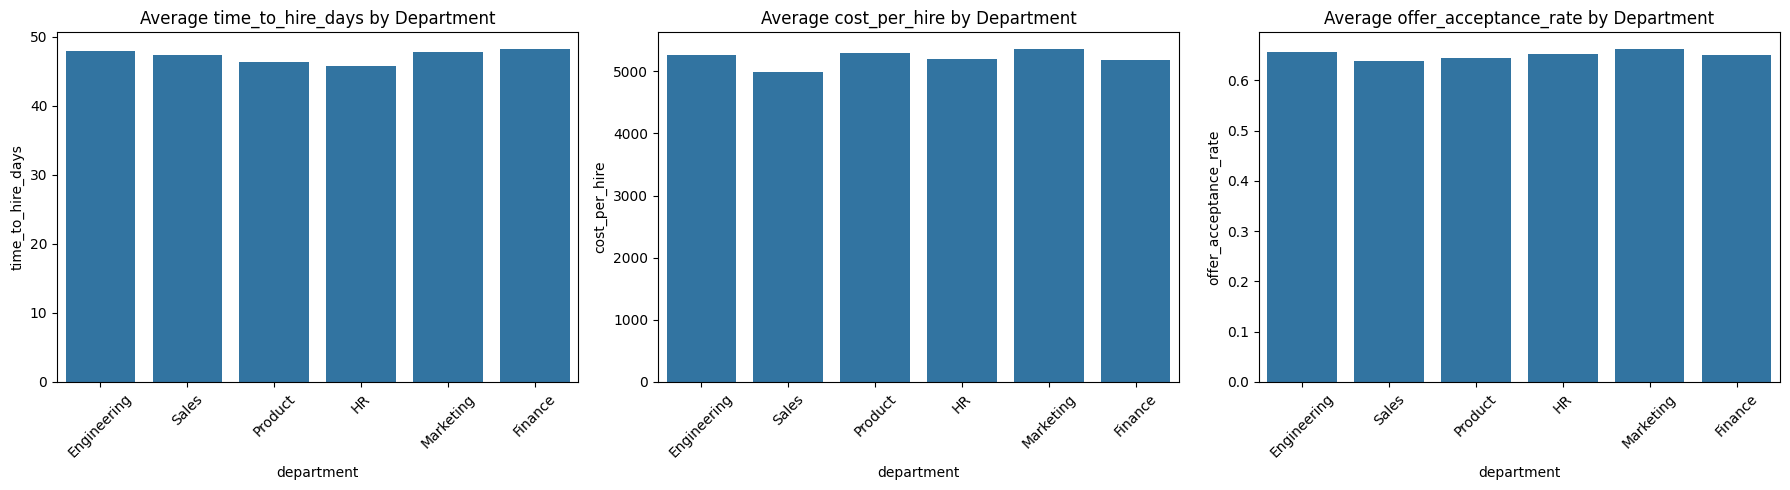

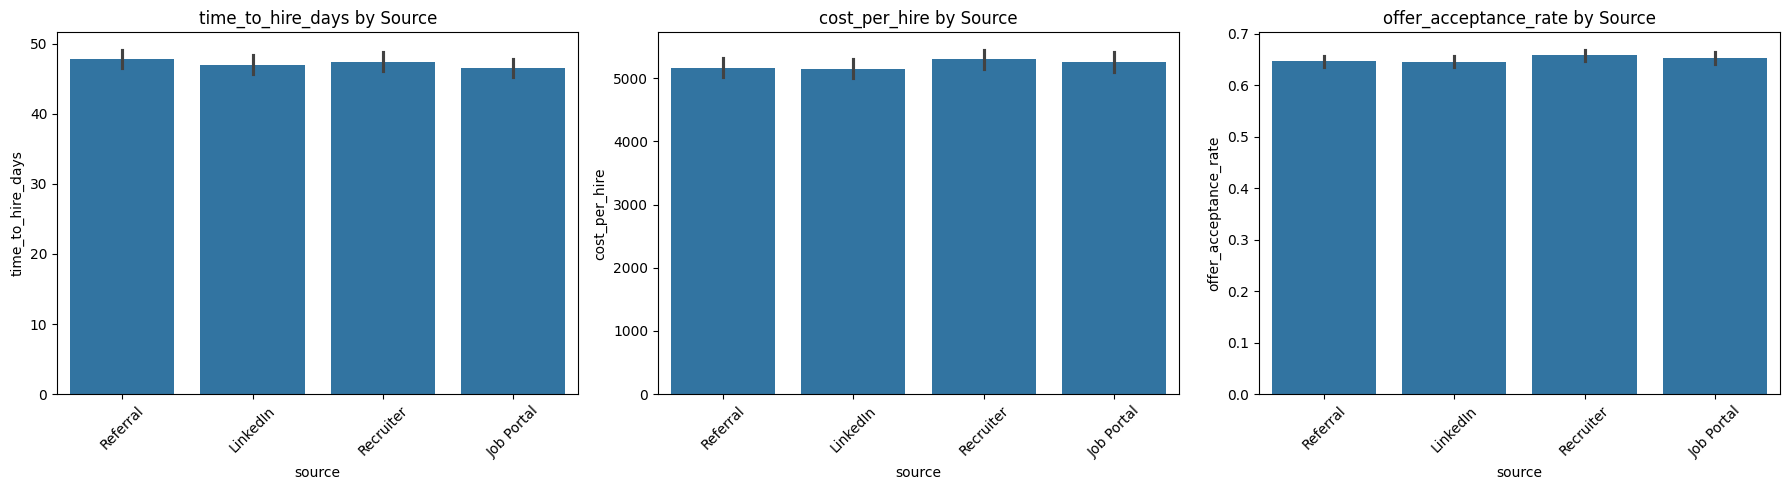

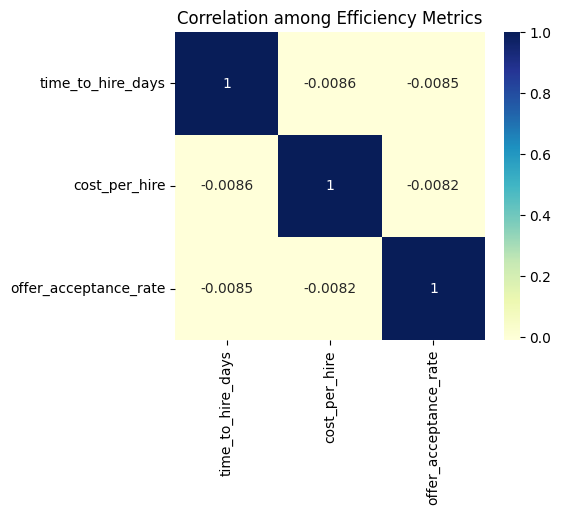

In [4]:
# 1.Department vs target
fig, axes = plt.subplots(1, len(targets), figsize=(18, 5))
for i, col in enumerate(targets):
    sns.barplot(x='department', y=col, data=df, estimator='mean', ci=None, ax=axes[i])
    axes[i].set_title(f'Average {col} by Department')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# 2. Source vs target
fig, axes = plt.subplots(1, len(targets), figsize=(18, 5))
for i, col in enumerate(targets):
    sns.barplot(x='source', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} by Source')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# 3️. Korelasi antar target
plt.figure(figsize=(5,4))
sns.heatmap(df[targets].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation among Efficiency Metrics')
plt.show()

/tmp/ipython-input-71296342.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='department', y=col, data=df, estimator='mean', ci=None, ax=axes[i])
/tmp/ipython-input-71296342.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='department', y=col, data=df, estimator='mean', ci=None, ax=axes[i])
/tmp/ipython-input-71296342.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='department', y=col, data=df, estimator='mean', ci=None, ax=axes[i])


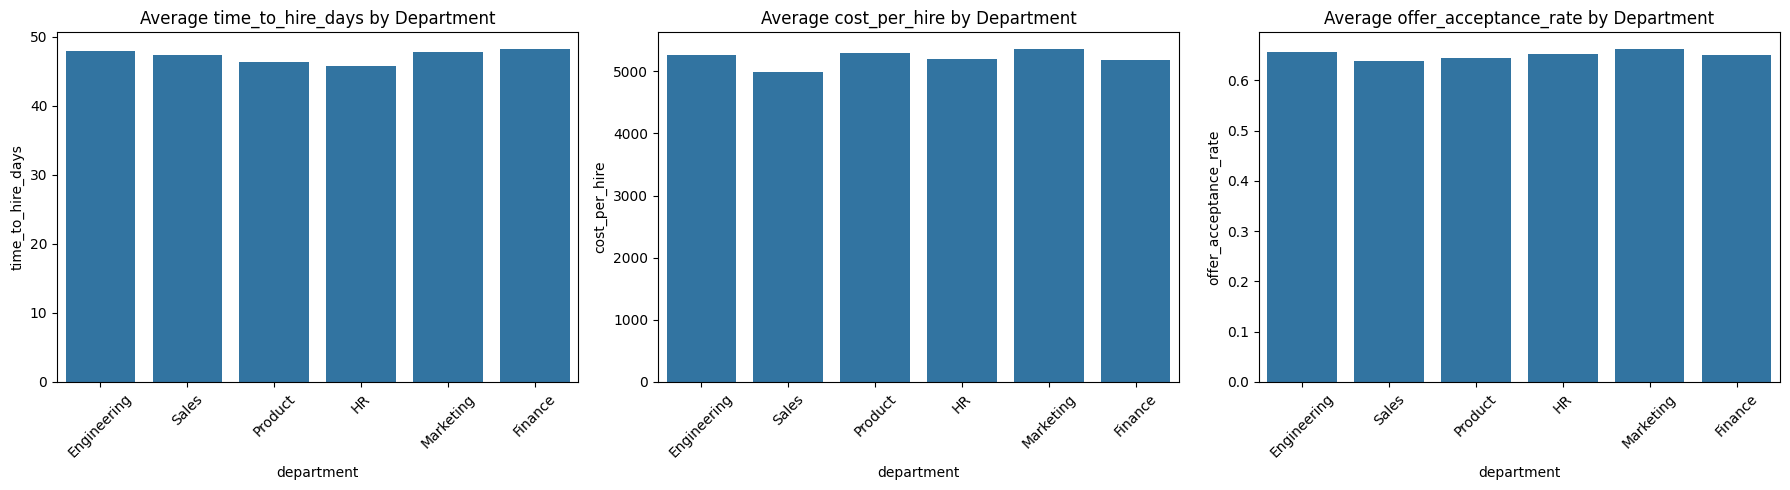

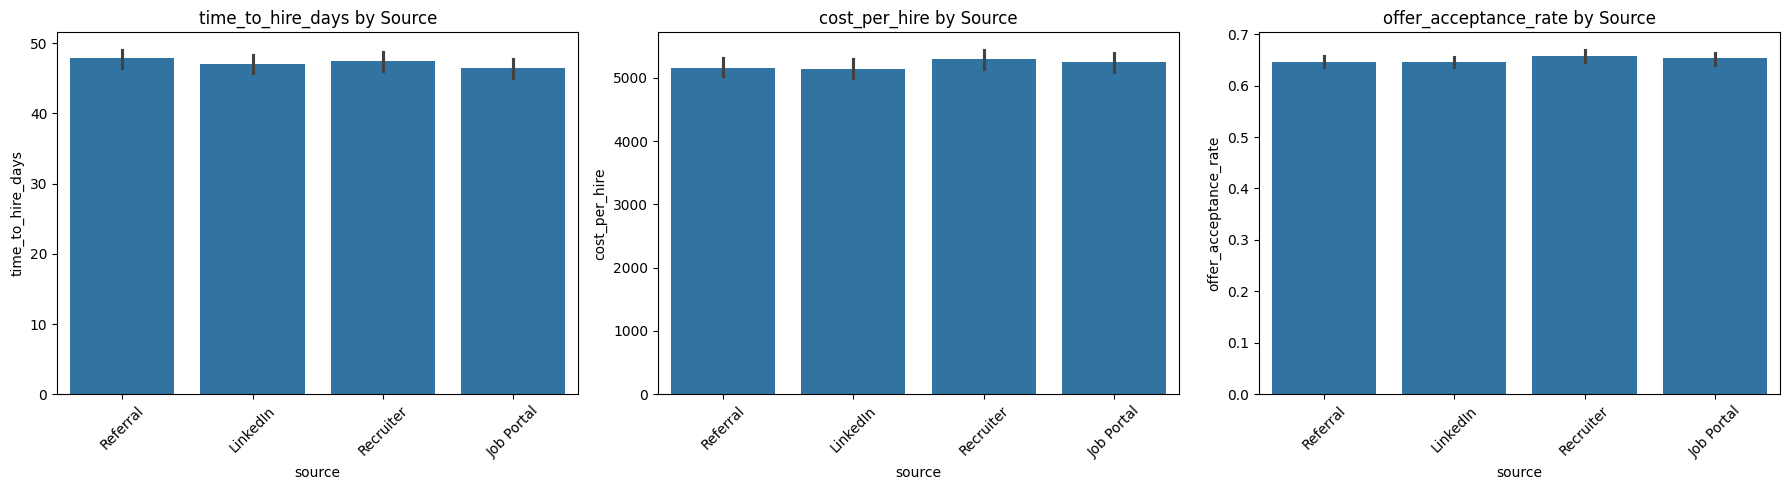

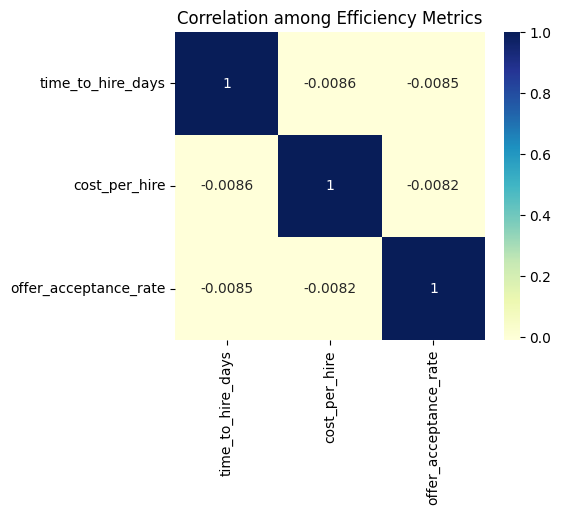

In [5]:
# 1.Department vs target
fig, axes = plt.subplots(1, len(targets), figsize=(18, 5))
for i, col in enumerate(targets):
    sns.barplot(x='department', y=col, data=df, estimator='mean', ci=None, ax=axes[i])
    axes[i].set_title(f'Average {col} by Department')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# 2. Source vs target
fig, axes = plt.subplots(1, len(targets), figsize=(18, 5))
for i, col in enumerate(targets):
    sns.barplot(x='source', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} by Source')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# 3️. Korelasi antar target
plt.figure(figsize=(5,4))
sns.heatmap(df[targets].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation among Efficiency Metrics')
plt.show()

In [6]:
import pandas as pd
from scipy.stats import f_oneway, kruskal

for num_var in numerical_cols:
    for cat_var in categorical_cols:
        grouped = [df[num_var][df[cat_var] == level] for level in df[cat_var].unique()]
        stat, p = f_oneway(*grouped)
        print(f"{cat_var} vs {num_var} → p-value: {p:.4f}")

department vs num_applicants → p-value: 0.4039
job_title vs num_applicants → p-value: 0.7021
source vs num_applicants → p-value: 0.7560
department vs time_to_hire_days → p-value: 0.2109
job_title vs time_to_hire_days → p-value: 0.2099
source vs time_to_hire_days → p-value: 0.5579
department vs cost_per_hire → p-value: 0.0995
job_title vs cost_per_hire → p-value: 0.4393
source vs cost_per_hire → p-value: 0.4500
department vs offer_acceptance_rate → p-value: 0.2332
job_title vs offer_acceptance_rate → p-value: 0.1315
source vs offer_acceptance_rate → p-value: 0.3418


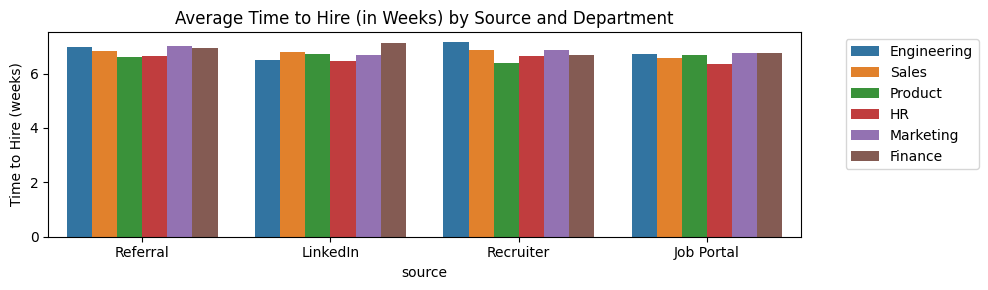

In [7]:
plt.figure(figsize=(10, 3))

ax = sns.barplot(
    y=df['time_to_hire_days'] / 7,
    x='source',
    hue='department',
    data=df,
    errorbar=None
)
plt.title('Average Time to Hire (in Weeks) by Source and Department')
plt.ylabel('Time to Hire (weeks)')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

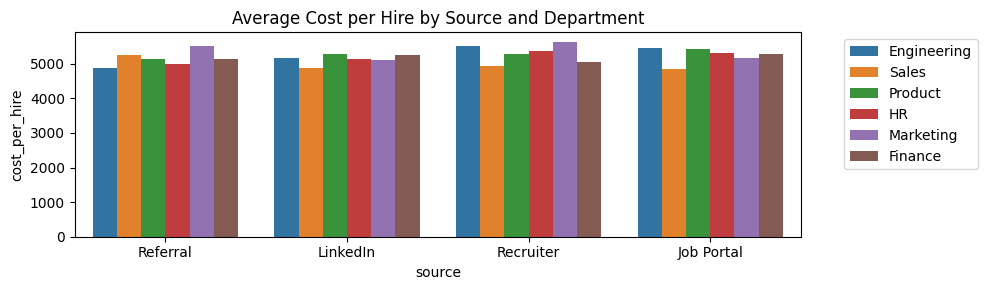

In [8]:
plt.figure(figsize=(10, 3))

ax = sns.barplot(y='cost_per_hire', x='source', hue='department', data=df, errorbar=None)
plt.title('Average Cost per Hire by Source and Department')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

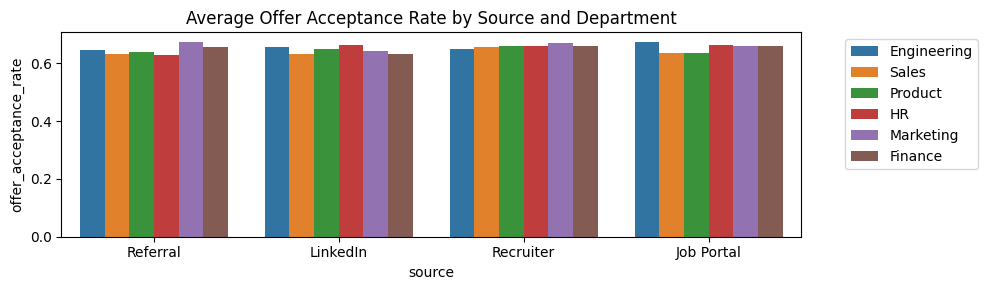

In [9]:
plt.figure(figsize=(10, 3))

ax = sns.barplot(y='offer_acceptance_rate', x='source', hue='department', data=df, errorbar=None)
plt.title('Average Offer Acceptance Rate by Source and Department')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

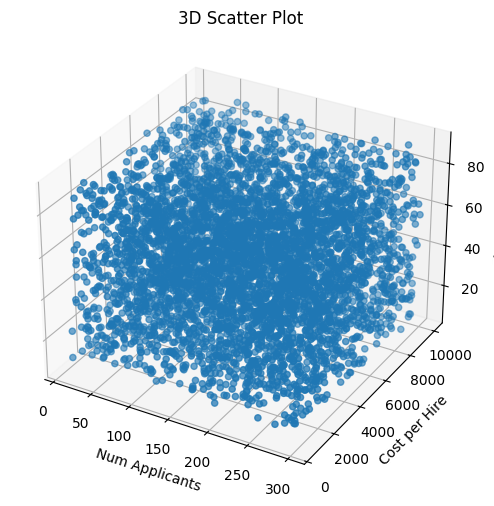

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['num_applicants'], df['cost_per_hire'], df['time_to_hire_days'])
ax.set_xlabel('Num Applicants')
ax.set_ylabel('Cost per Hire')
ax.set_zlabel('Time to Hire')
plt.title("3D Scatter Plot")
plt.show()

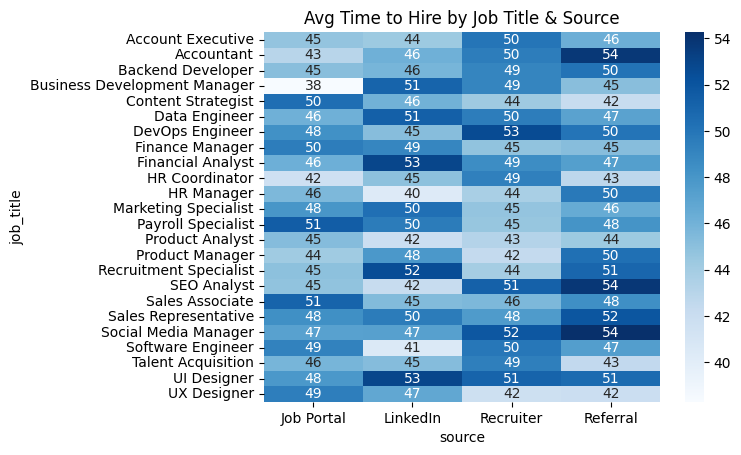

In [19]:
pivot = df.pivot_table(
    index="job_title",
    columns="source",
    values="time_to_hire_days",
    aggfunc="mean"
)
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Avg Time to Hire by Job Title & Source")
plt.show()

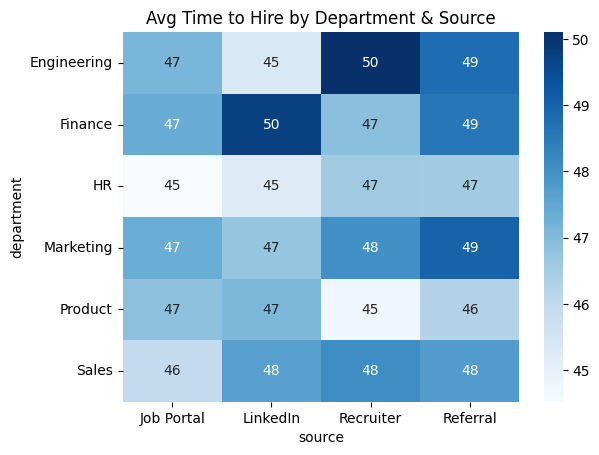

In [20]:
pivot = df.pivot_table(
    index="department",
    columns="source",
    values="time_to_hire_days",
    aggfunc="mean"
)
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Avg Time to Hire by Department & Source")
plt.show()

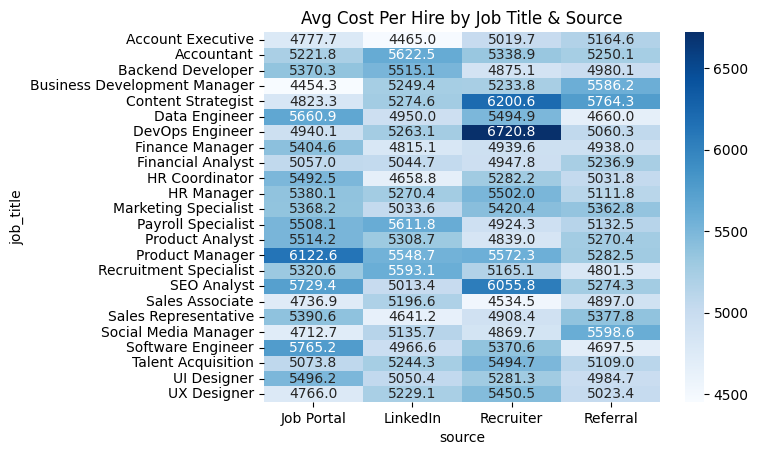

In [13]:
pivot = df.pivot_table(
    index="job_title",
    columns="source",
    values="cost_per_hire",
    aggfunc="mean"
)
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="Blues")
plt.title("Avg Cost Per Hire by Job Title & Source")
plt.show()

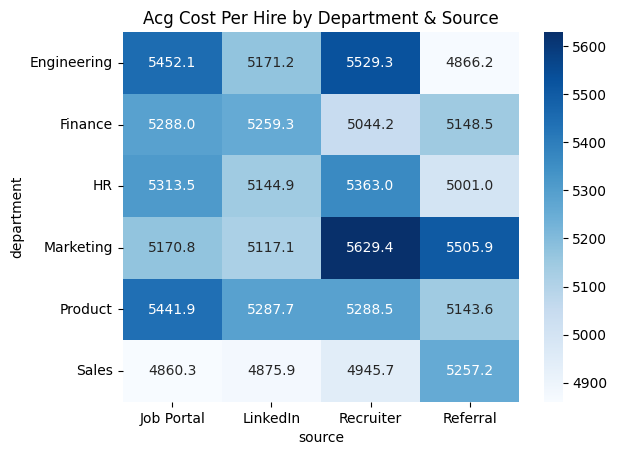

In [14]:
pivot = df.pivot_table(
    index="department",
    columns="source",
    values="cost_per_hire",
    aggfunc="mean"
)
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="Blues")
plt.title("Acg Cost Per Hire by Department & Source")
plt.show()

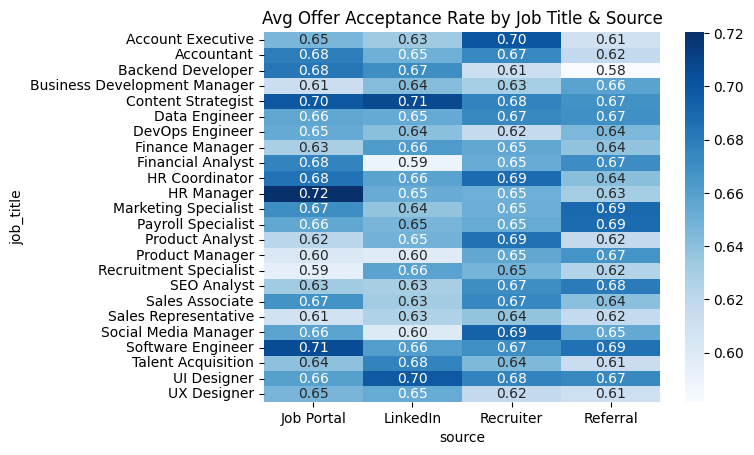

In [17]:
pivot = df.pivot_table(
    index="job_title",
    columns="source",
    values="offer_acceptance_rate",
    aggfunc="mean"
)
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="Blues")
plt.title("Avg Offer Acceptance Rate by Job Title & Source")
plt.show()

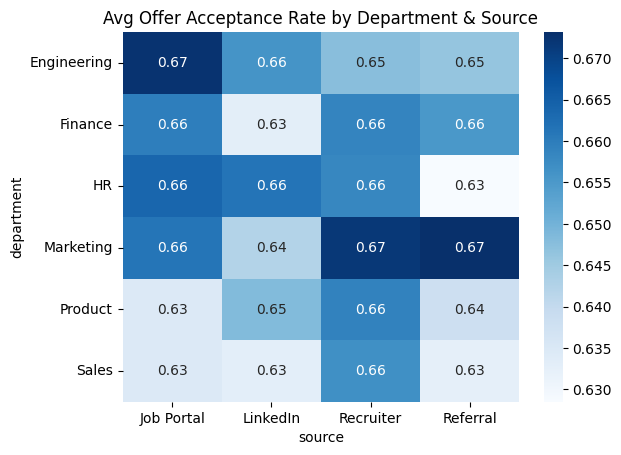

In [18]:
pivot = df.pivot_table(
    index="department",
    columns="source",
    values="offer_acceptance_rate",
    aggfunc="mean"
)
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="Blues")
plt.title("Avg Offer Acceptance Rate by Department & Source")
plt.show()